In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pickle
plt.style.use('ggplot')

In [2]:
e_items = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'Valence', 'Arousal', 'like']
primes = ['none', 'bpm', 'chord', 'lyrics', 'playcount']

In [3]:
with open('./result.csv', 'r') as f:
    results = pd.read_csv(f)
results = results.groupby(['m_id', 'prime']).mean()
results = results.reset_index(level=[0, 1])
# results

In [4]:
results_items = {}
for e_item in e_items:
    result_item = pd.DataFrame()
    for prime in primes:
        tmp = results[results['prime'] == prime]
        tmp_series = pd.Series(tmp[e_item].values, index=tmp['m_id'].values)
        result_item[prime] = tmp_series
    results_items[e_item] = result_item
# results_items['C1']

In [5]:
with open('./moods100.pkl', 'rb') as f:
    moods = pickle.load(f)

### 好感度のプライミング有り・無しの比較


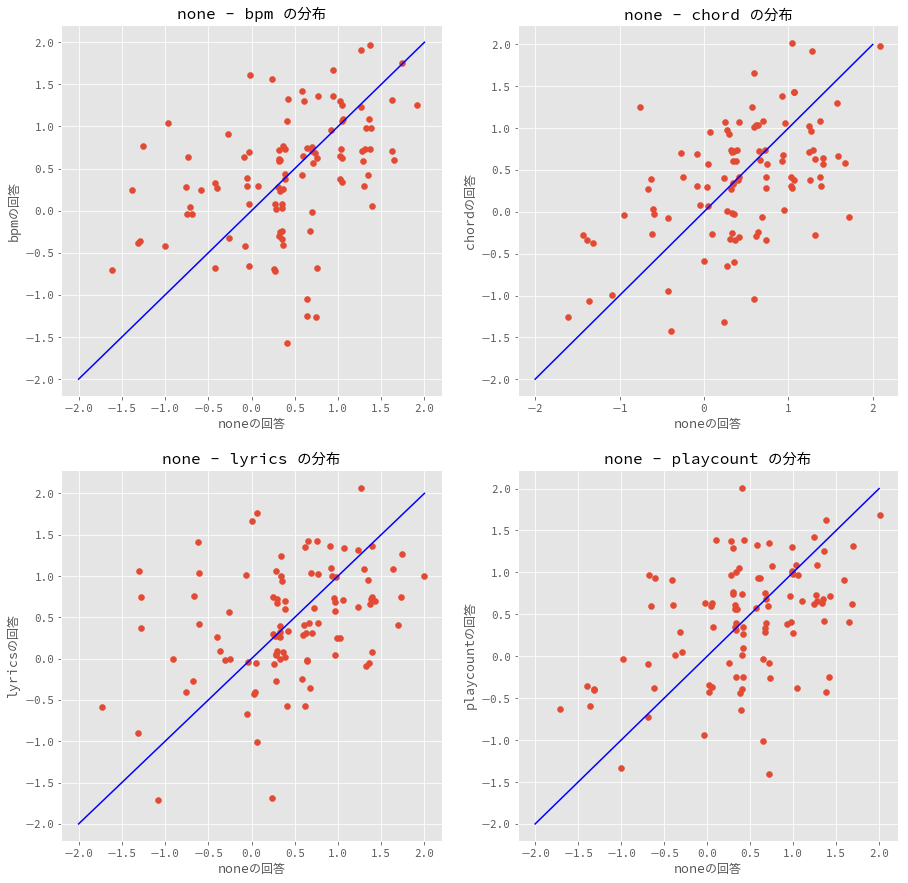

In [6]:
plt.clf()
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
# plt.subplots_adjust(wspace=0.4, hspace=0.6)

result_like = results_items['like']
for i, prime in enumerate(primes[1:]):
    x = result_like['none'] + np.random.uniform(-0.1, 0.1, 100)
    y = result_like[prime] + np.random.uniform(-0.1, 0.1, 100)

    px =  int(i / 2)
    py = i % 2
    axes[px, py].scatter(x, y)
    axes[px, py].plot([-2, 2], [-2, 2], c='b')
    axes[px, py].set_title('none - %s の分布' % prime)
    axes[px, py].set_ylabel('%sの回答' % prime)
    axes[px, py].set_xlabel('noneの回答')
plt.show()

## 直線を堺にどんな違いが出るのか？

とりあえずデータセットの評価値で色を付けて、直線で色が分かれてるといい  
直線より上の方が色が濃い　＝ その評価値が高いものはプライミング効果で好感度が上がりやすい

In [7]:
id_row = list(moods[moods['C1'] >= 1]['C1'].index)
id_row


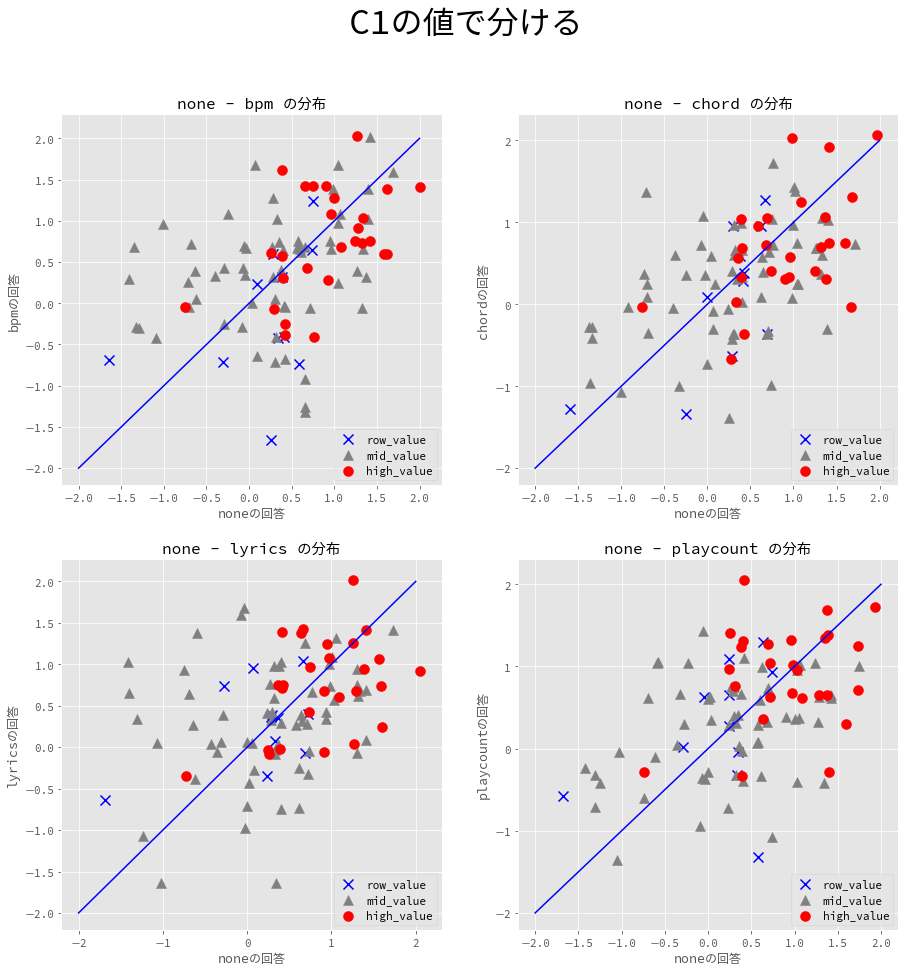

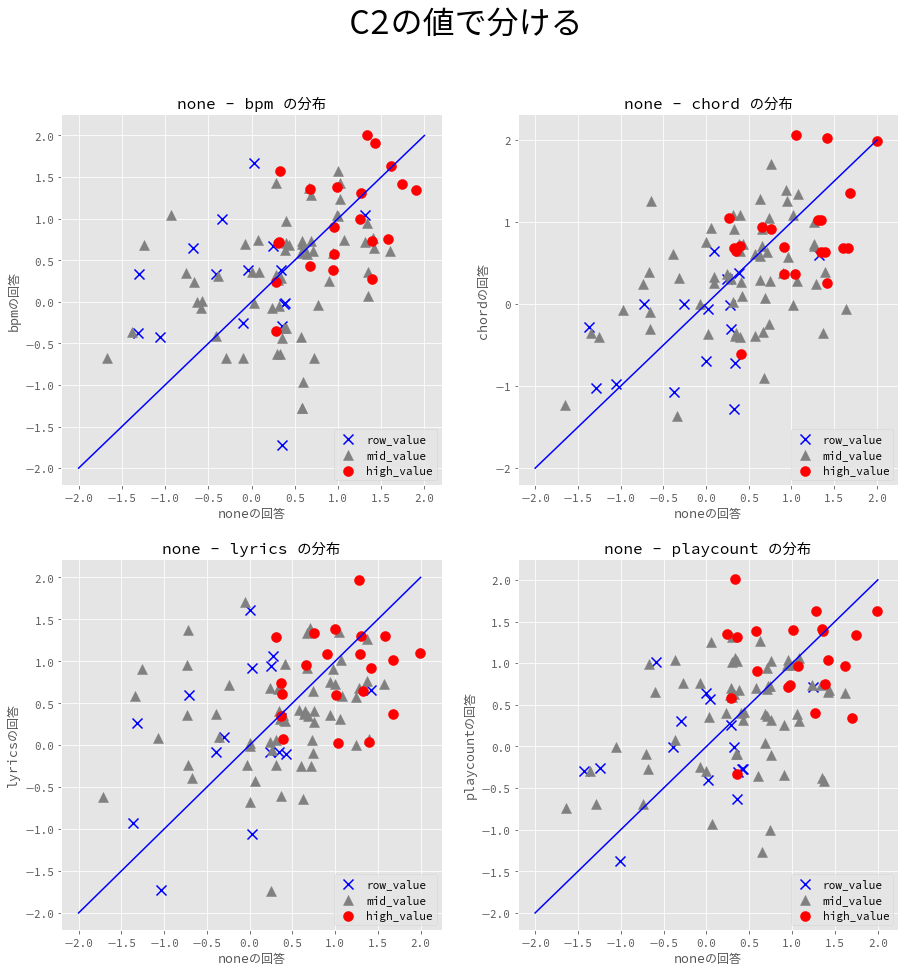

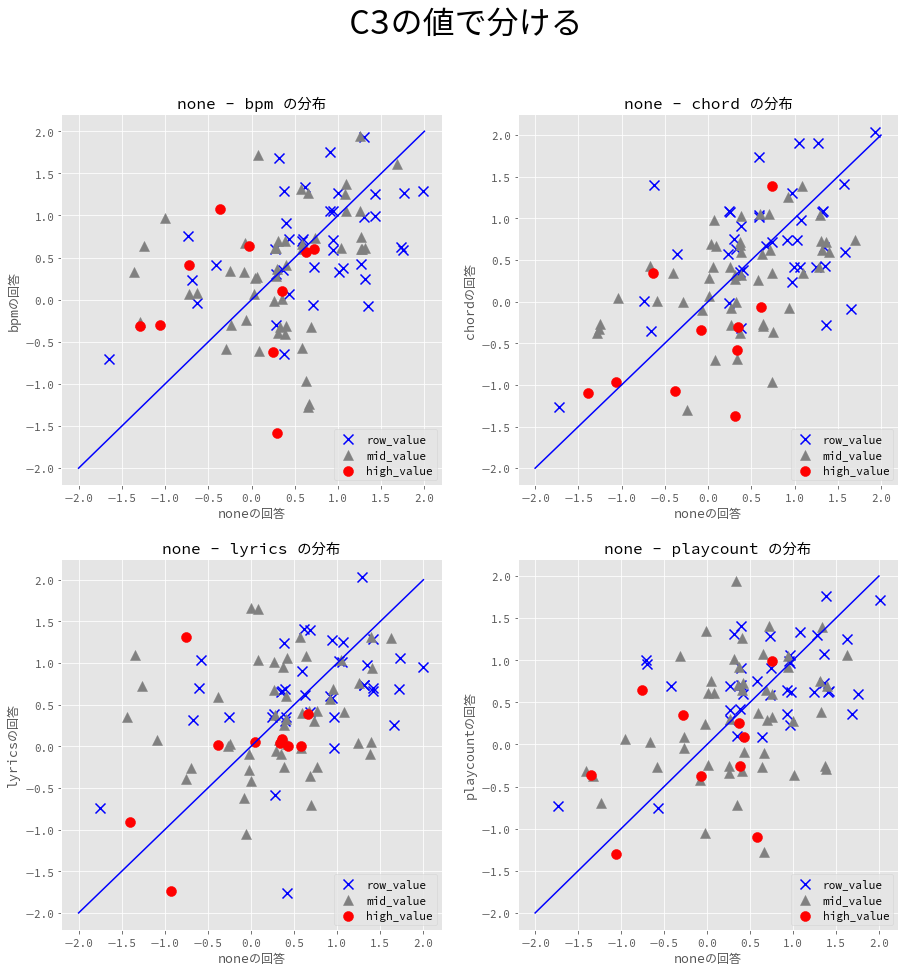

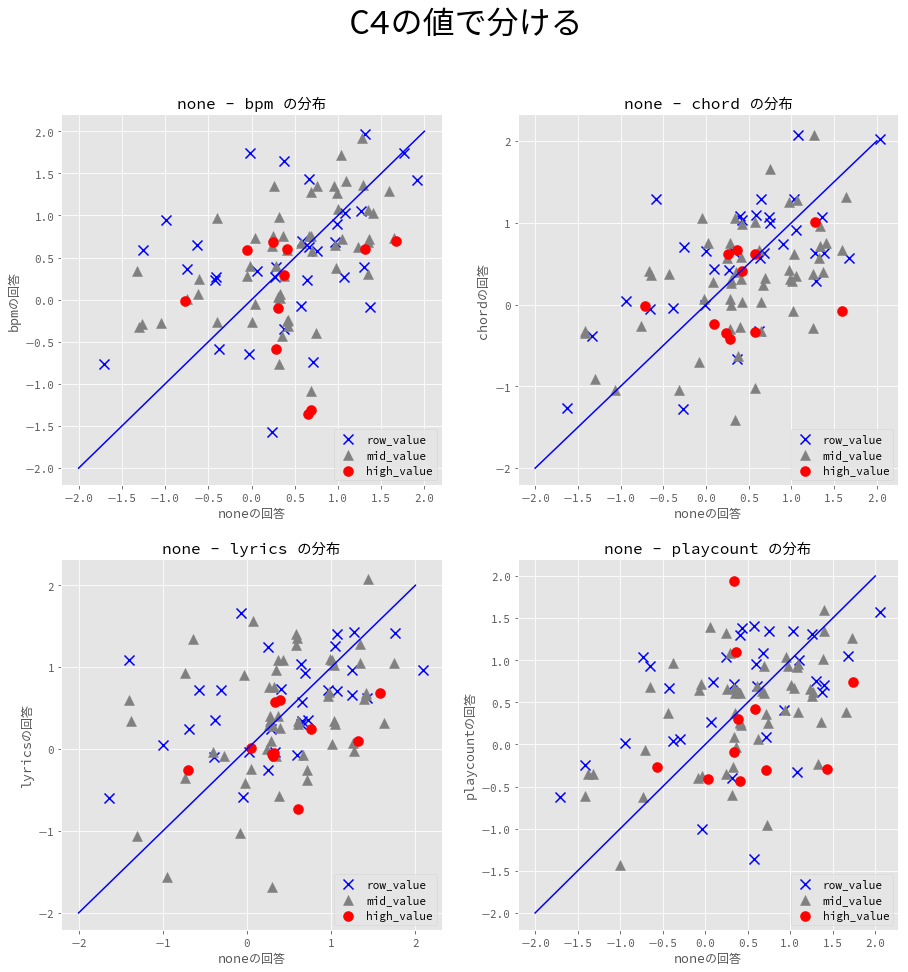

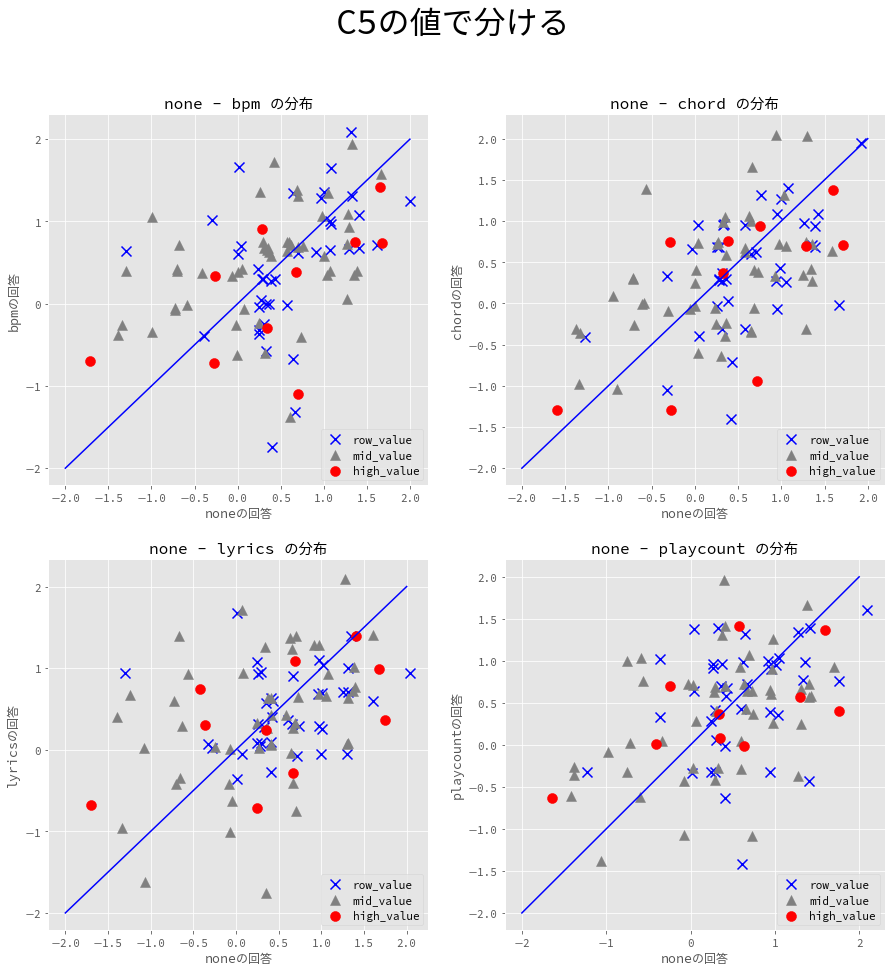

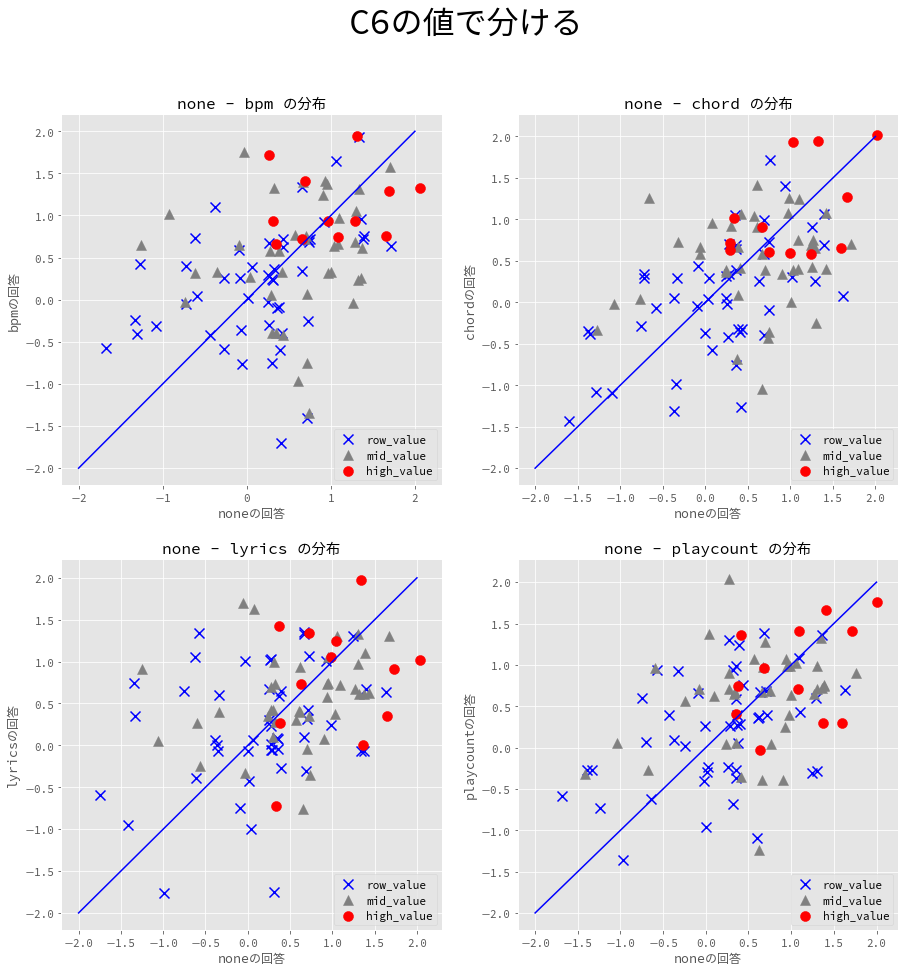

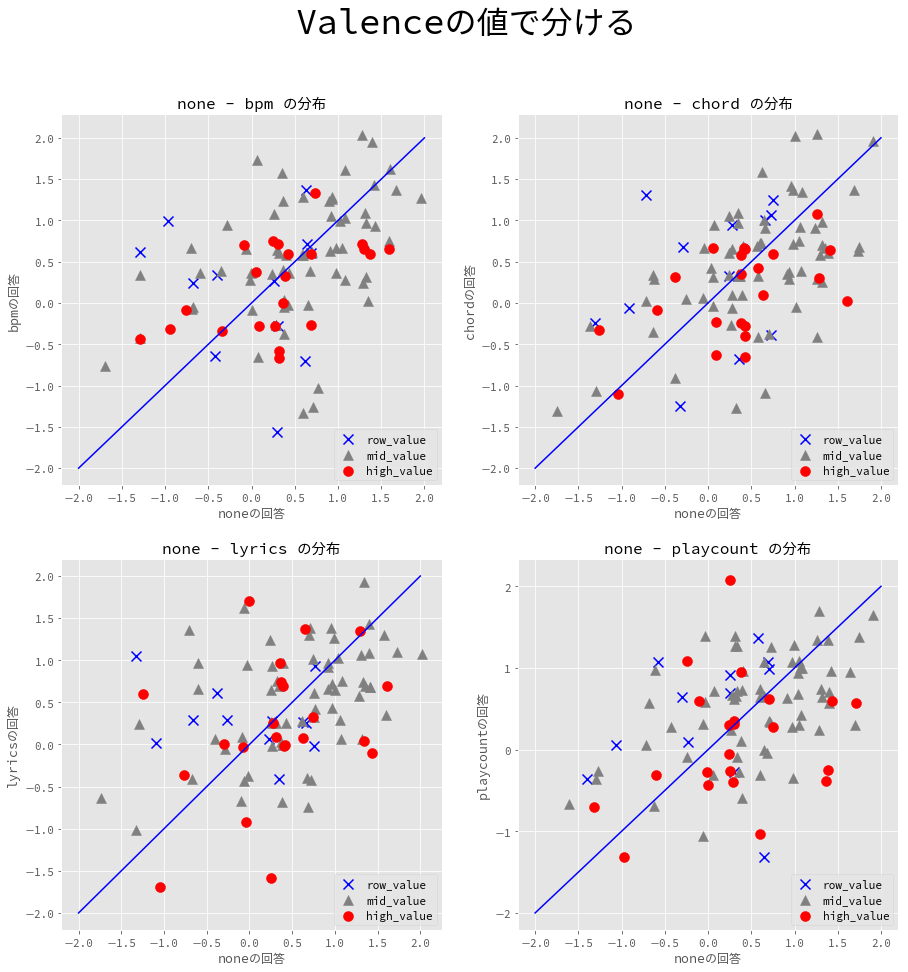

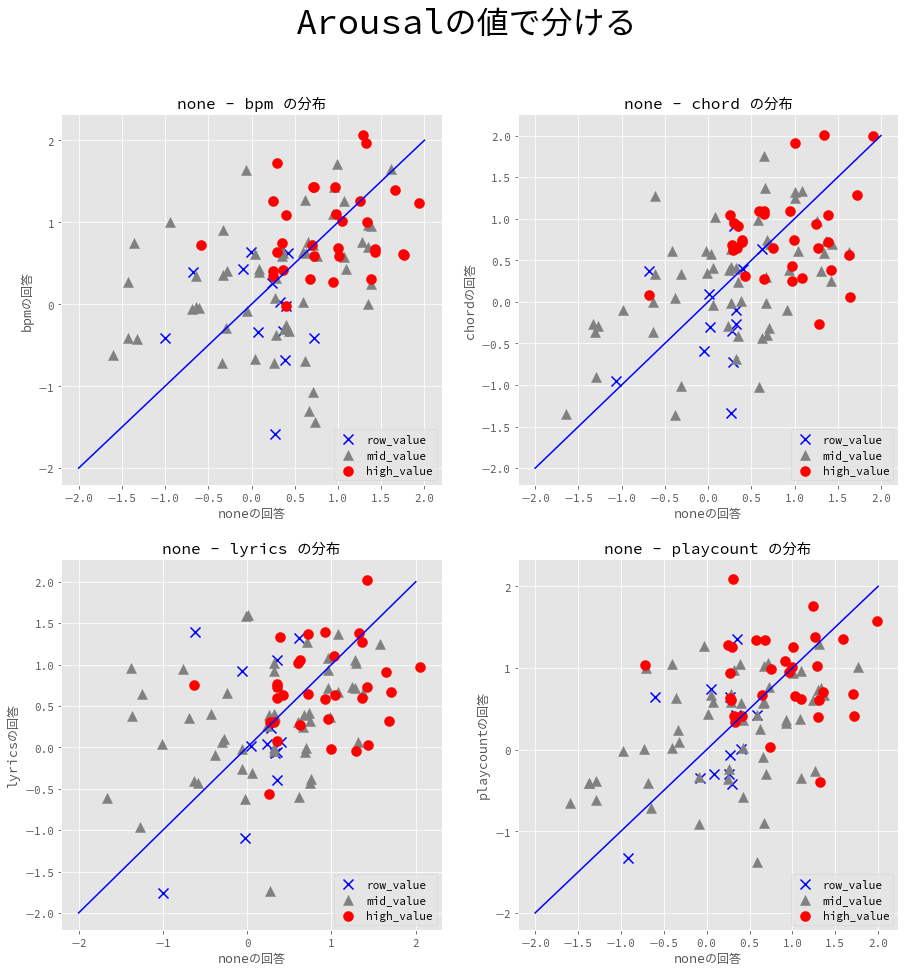

In [12]:
plt.close()
plt.clf()

pt, nt = 1, -1
result_like = results_items['like']
for e_item in e_items[:-1]:
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    fig.suptitle('%sの値で分ける' % e_item, fontsize=32)

    id_row = list(moods[moods[e_item] <= nt][e_item].index)
    id_mid = list(moods[(moods[e_item] > nt) & (moods[e_item] < pt)][e_item].index)
    id_high = list(moods[moods[e_item] >= pt][e_item].index)
    for i, prime in enumerate(primes[1:]):
        
        x_row = result_like.loc[id_row, :]['none'] + np.random.uniform(-0.1, 0.1, len(id_row))
        y_row = result_like.loc[id_row, :][prime] + np.random.uniform(-0.1, 0.1, len(id_row))
        
        x_mid = result_like.loc[id_mid, :]['none'] + np.random.uniform(-0.1, 0.1, len(id_mid))
        y_mid = result_like.loc[id_mid, :][prime] + np.random.uniform(-0.1, 0.1, len(id_mid))
        
        x_high = result_like.loc[id_high, :]['none'] + np.random.uniform(-0.1, 0.1, len(id_high))
        y_high = result_like.loc[id_high, :][prime] + np.random.uniform(-0.1, 0.1, len(id_high))
        
        px =  int(i / 2)
        py = i % 2
        
        axes[px, py].scatter(x_row, y_row, s=100, marker='x', c='blue', label='row_value')
        axes[px, py].scatter(x_mid, y_mid, s=100, marker='^', c='grey', label='mid_value')
        axes[px, py].scatter(x_high, y_high, s=100, marker='o', c='red', label='high_value')
        axes[px, py].legend(loc='lower right')
#         axes[px, py].colorbar()
        axes[px, py].plot([-2, 2], [-2, 2], c='b')
        axes[px, py].set_title('none - %s の分布' % prime)
        axes[px, py].set_ylabel('%sの回答' % prime)
        axes[px, py].set_xlabel('noneの回答')
plt.show()
plt.close()

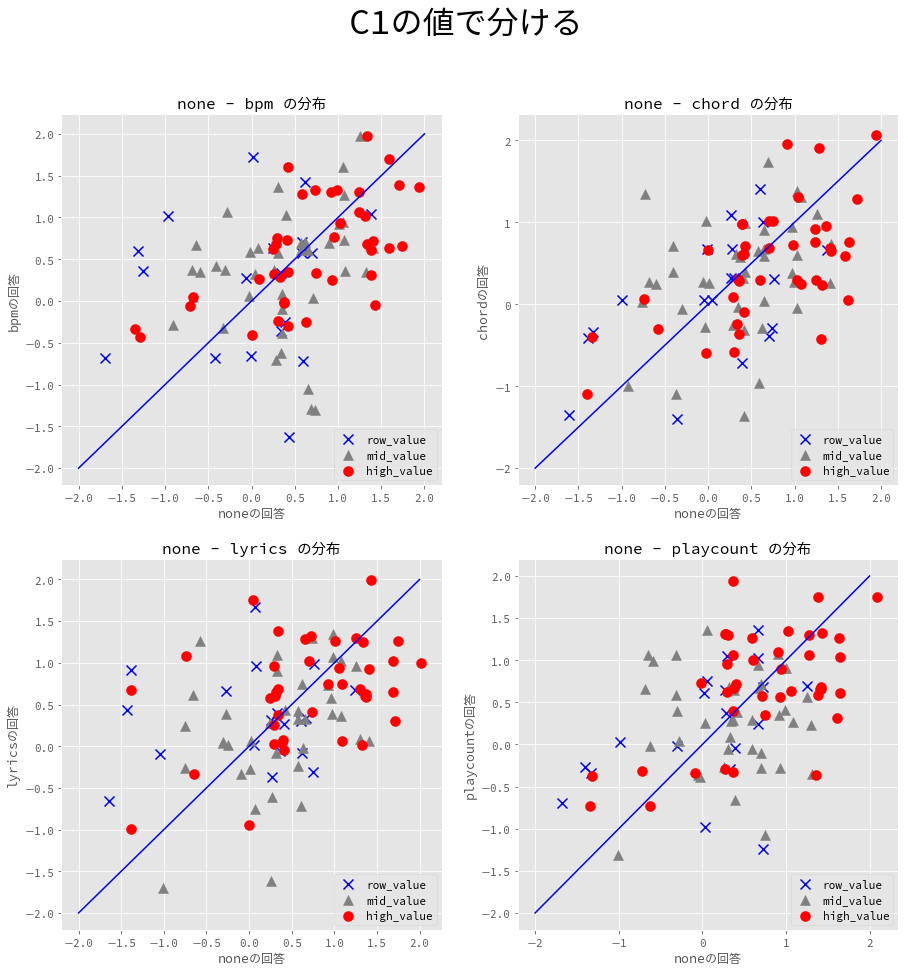

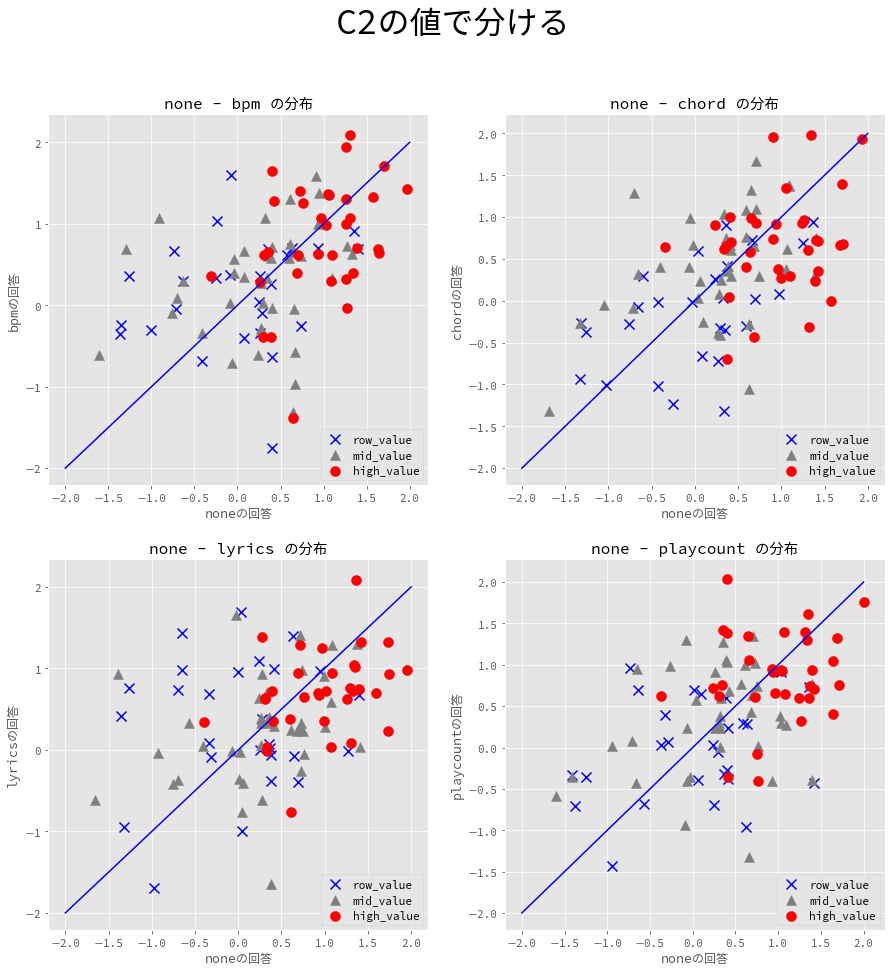

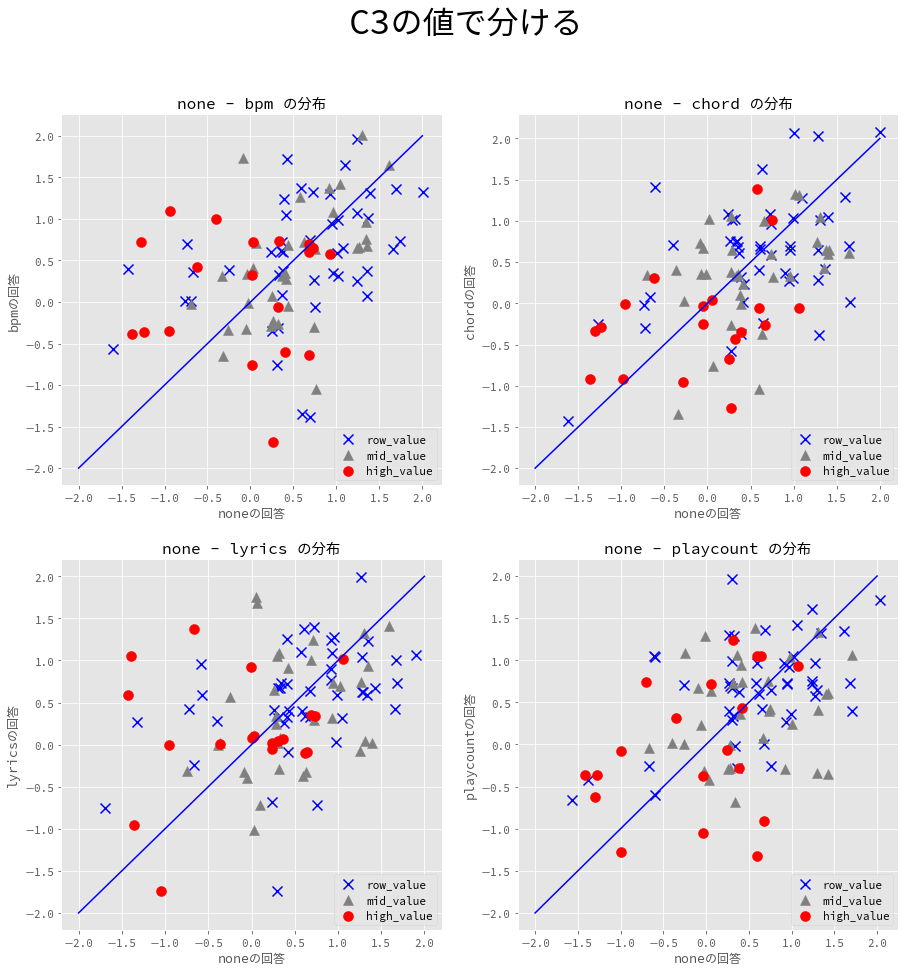

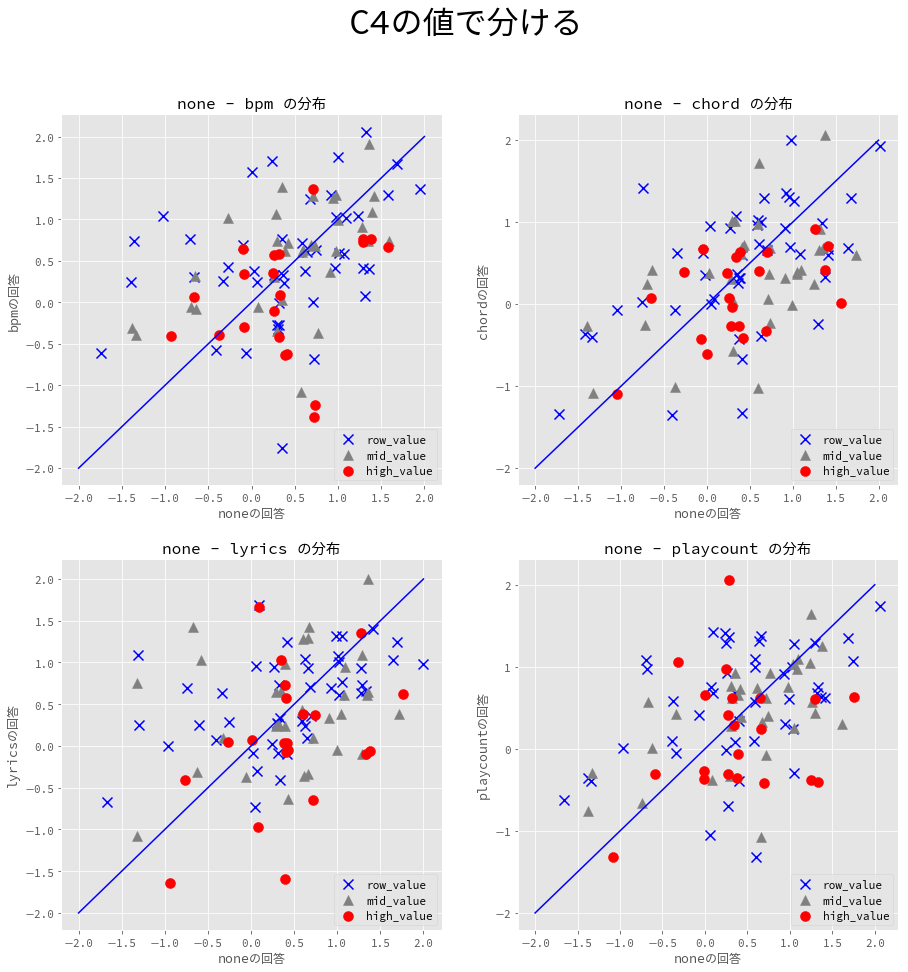

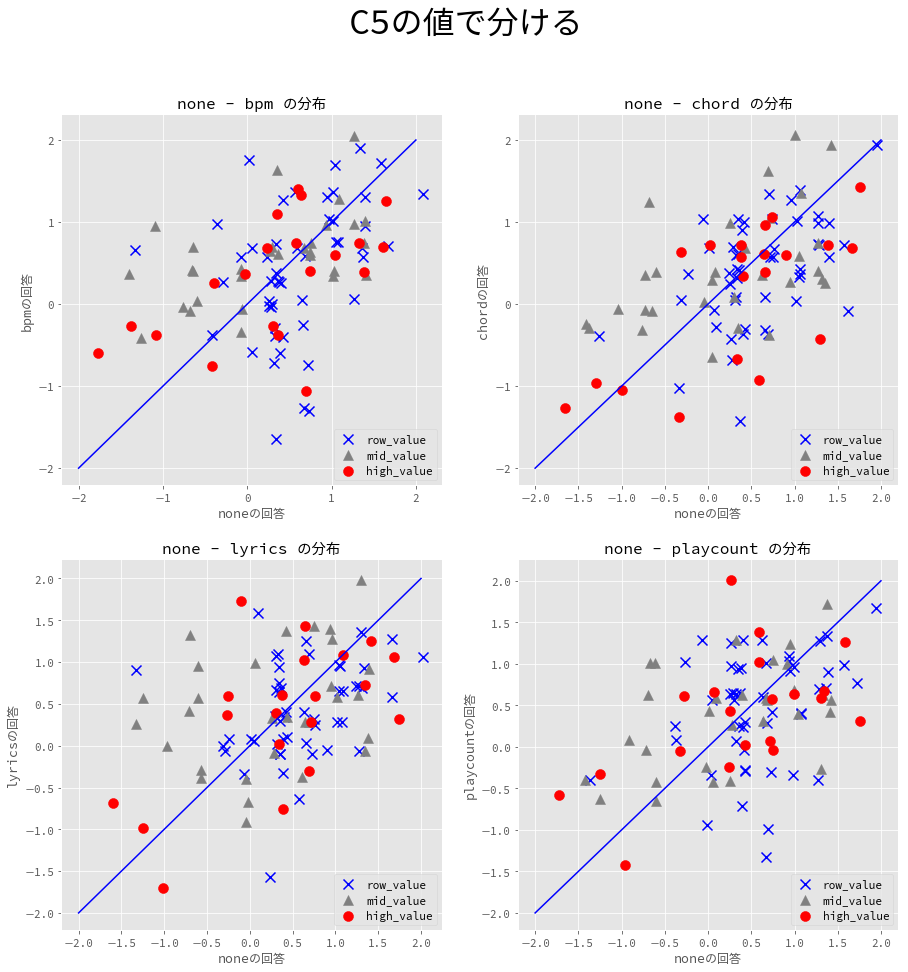

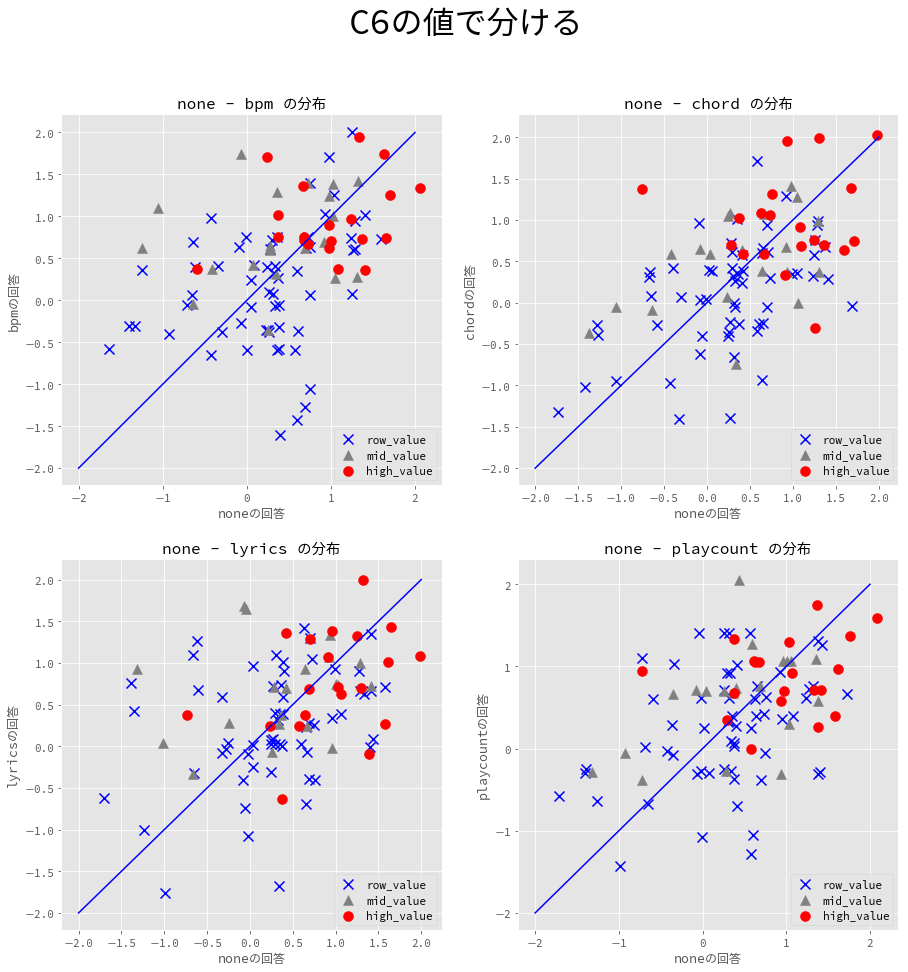

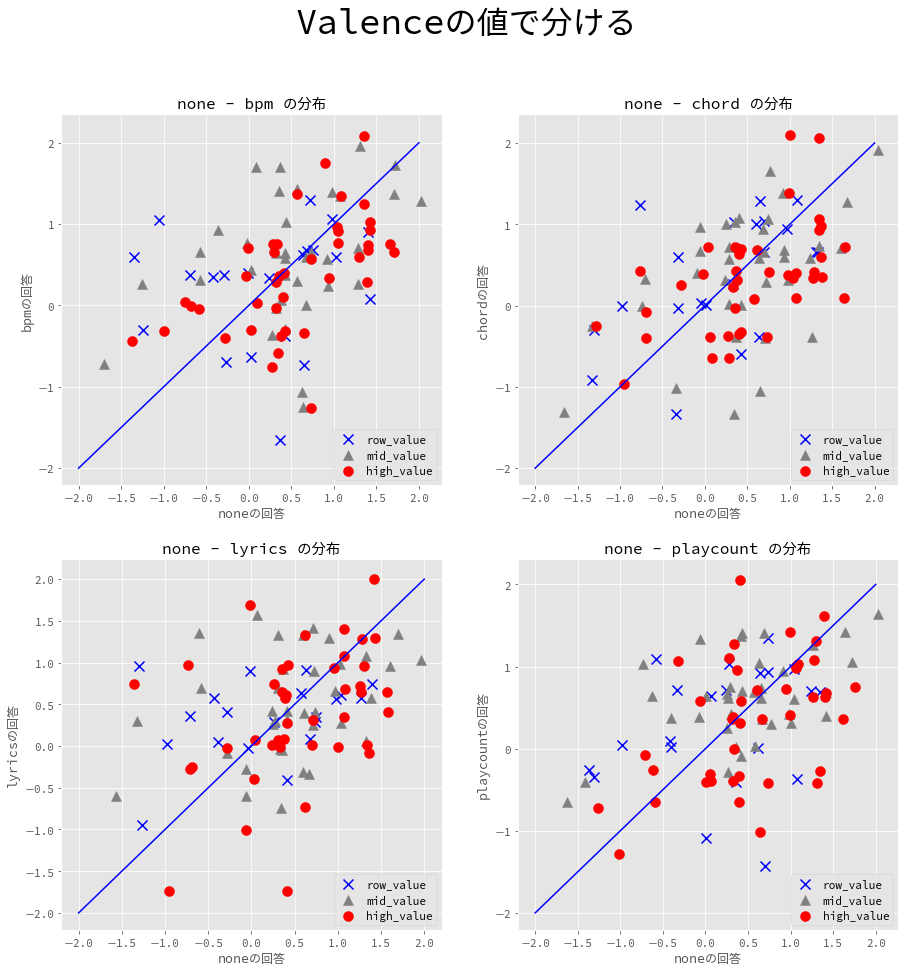

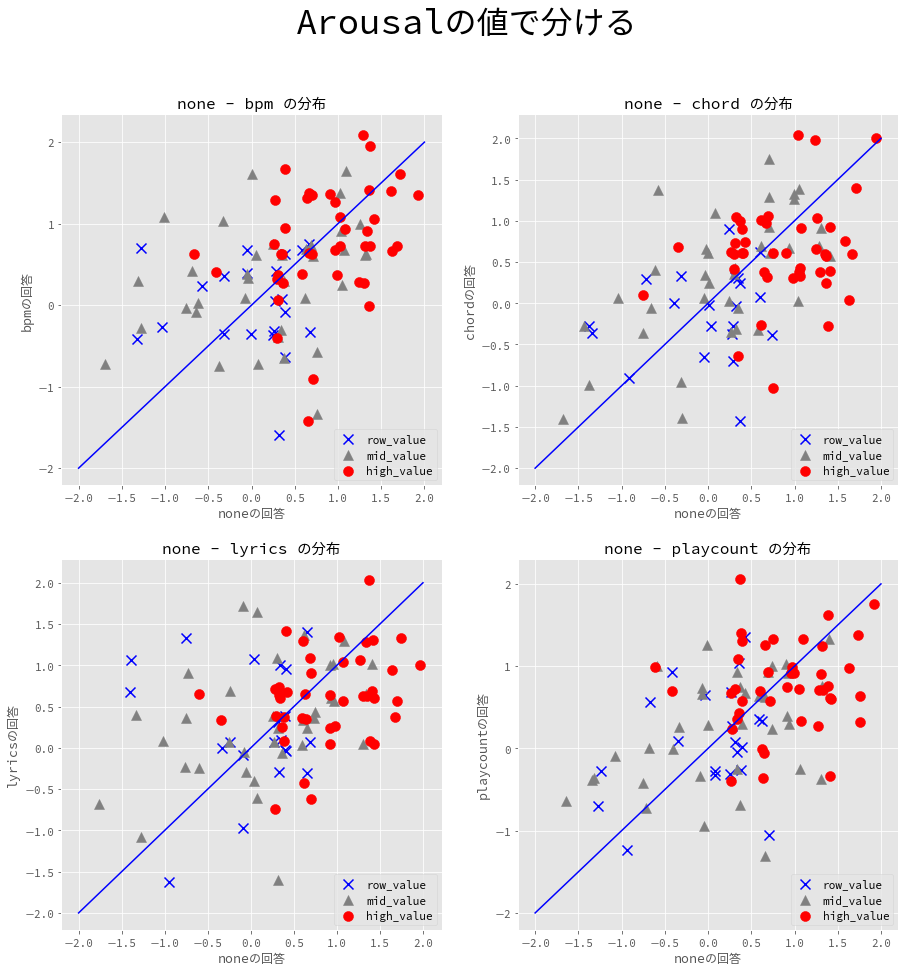

In [13]:
plt.close()
plt.clf()

pt, nt = 0.5, -0.5
result_like = results_items['like']
for e_item in e_items[:-1]:
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    fig.suptitle('%sの値で分ける' % e_item, fontsize=32)

    id_row = list(moods[moods[e_item] <= nt][e_item].index)
    id_mid = list(moods[(moods[e_item] > nt) & (moods[e_item] < pt)][e_item].index)
    id_high = list(moods[moods[e_item] >= pt][e_item].index)
    for i, prime in enumerate(primes[1:]):
        
        x_row = result_like.loc[id_row, :]['none'] + np.random.uniform(-0.1, 0.1, len(id_row))
        y_row = result_like.loc[id_row, :][prime] + np.random.uniform(-0.1, 0.1, len(id_row))
        
        x_mid = result_like.loc[id_mid, :]['none'] + np.random.uniform(-0.1, 0.1, len(id_mid))
        y_mid = result_like.loc[id_mid, :][prime] + np.random.uniform(-0.1, 0.1, len(id_mid))
        
        x_high = result_like.loc[id_high, :]['none'] + np.random.uniform(-0.1, 0.1, len(id_high))
        y_high = result_like.loc[id_high, :][prime] + np.random.uniform(-0.1, 0.1, len(id_high))
        
        px =  int(i / 2)
        py = i % 2
        
        axes[px, py].scatter(x_row, y_row, s=100, marker='x', c='blue', label='row_value')
        axes[px, py].scatter(x_mid, y_mid, s=100, marker='^', c='grey', label='mid_value')
        axes[px, py].scatter(x_high, y_high, s=100, marker='o', c='red', label='high_value')
        axes[px, py].legend(loc='lower right')
#         axes[px, py].colorbar()
        axes[px, py].plot([-2, 2], [-2, 2], c='b')
        axes[px, py].set_title('none - %s の分布' % prime)
        axes[px, py].set_ylabel('%sの回答' % prime)
        axes[px, py].set_xlabel('noneの回答')
plt.show()
plt.close()

In [9]:
# plt.clf()
# # fig, axes = plt.subplots(2, 2, figsize=(15, 15))
# # plt.subplots_adjust(wspace=0.4, hspace=0.6)

# result_like = results_items['like']
# for e_item in e_items[:-1]:
#     fig, axes = plt.subplots(2, 2, figsize=(15, 15))
#     fig.suptitle('%sの値でカラーリング' % e_item, fontsize=32)
#     for i, prime in enumerate(primes[1:]):
#         x = result_like['none'] + np.random.uniform(-0.1, 0.1, 100)
#         y = result_like[prime] + np.random.uniform(-0.1, 0.1, 100)
#         values = moods[e_item]

#         px =  int(i / 2)
#         py = i % 2
#         axes[px, py].scatter(x, y, s=200, c=values, cmap='Reds')
# #         axes[px, py].colorbar()
#         axes[px, py].plot([-2, 2], [-2, 2], c='b')
#         axes[px, py].set_title('none - %s の分布' % prime)
#         axes[px, py].set_ylabel('%sの回答' % prime)
#         axes[px, py].set_xlabel('noneの回答')
# plt.show()